# 1.Loading the Data and Packages

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [156]:
# loading required packages
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import matplotlib.pyplot as plt

In [157]:
if torch.cuda.is_available():
    print('device available')
    device = torch.device('cuda')
else:
    print('device unavailable')
    device = torch.device('cpu')

device available


Loading Train, Test and Validation set and standardizing it.

In [158]:
train_set_x = np.load('/content/gdrive/My Drive/Memes_Vs_Notes/#Dataset/train_set_x_orig.npy')
train_set_y = np.load('/content/gdrive/My Drive/Memes_Vs_Notes/#Dataset/train_set_y.npy')
test_set_x = np.load('/content/gdrive/My Drive/Memes_Vs_Notes/#Dataset/test_set_x_orig.npy')
test_set_y = np.load('/content/gdrive/My Drive/Memes_Vs_Notes/#Dataset/test_set_y.npy')
dev_set_x = np.load('/content/gdrive/My Drive/Memes_Vs_Notes/#Dataset/dev_set_x_orig.npy')
dev_set_y = np.load('/content/gdrive/My Drive/Memes_Vs_Notes/#Dataset/dev_set_y.npy')
print("train_set_x.shape = " + str(train_set_x.shape))
print("train_set_y.shape = " + str(train_set_y.shape))
print("train_set_x.shape = " + str(test_set_x.shape))
print("test_set_y.shape = " + str(test_set_y.shape))
print("dev_set_x.shape = " + str(dev_set_x.shape))
print("dev_set_y.shape = " + str(dev_set_y.shape))


print(train_set_y[:5])
print(test_set_y[:5])
print(dev_set_y[:5])

train_set_x.shape = (1520, 256, 256, 3)
train_set_y.shape = (1520,)
train_set_x.shape = (48, 256, 256, 3)
test_set_y.shape = (48,)
dev_set_x.shape = (32, 256, 256, 3)
dev_set_y.shape = (32,)
[0 0 0 0 1]
[1 1 1 1 1]
[0 1 0 1 0]


In [159]:
# converting all to float and normalizing
train_set_x = (train_set_x.astype(float))/255
train_set_y = (train_set_y.astype(float))
test_set_x = (test_set_x.astype(float))/255
test_set_y = (test_set_y.astype(float))
dev_set_x = (dev_set_x.astype(float))/255
dev_set_y = (dev_set_y.astype(float))

# to convert into (m,channels,height,weight)
train_set_x = np.transpose(train_set_x,(0,3,1,2)) # to convert into (m,channels,height,weight)
test_set_x = np.transpose(test_set_x,(0,3,1,2))
dev_set_x = np.transpose(dev_set_x,(0,3,1,2))

print(train_set_x.shape,train_set_y.shape)
print(test_set_x.shape, test_set_y.shape)
print(dev_set_x.shape, dev_set_y.shape)

(1520, 3, 256, 256) (1520,)
(48, 3, 256, 256) (48,)
(32, 3, 256, 256) (32,)


In [160]:
m_train = train_set_x.shape[0]
m_test = test_set_x.shape[0]
m_dev = dev_set_x.shape[0]

In [161]:
train_y = train_set_y.reshape(m_train,1)
print(train_y.shape)
test_y = test_set_y.reshape(m_test,1)
print(train_y.shape)
dev_y = dev_set_y.reshape(m_dev,1)
print(dev_y.shape)

(1520, 1)
(1520, 1)
(32, 1)


Y = 1.0
It's a Note.


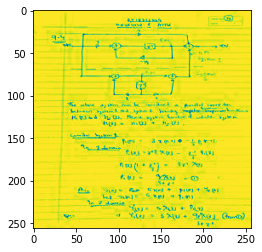

In [162]:
index = 6
plt.imshow(train_set_x[index,0,:,:])
Y = train_set_y[index,]
print("Y = " + str(train_set_y[index,]))
if Y == 0:
  print("It's a Meme.")
else:
  print("It's a Note.")      #memes are labelled as 0 and notes as 1

In [163]:
train_set_x = torch.from_numpy(train_set_x)
train_set_y = torch.from_numpy(train_set_y)
test_set_x = torch.from_numpy(test_set_x)
test_set_y = torch.from_numpy(test_set_y)
dev_set_x = torch.from_numpy(dev_set_x)
dev_set_y = torch.from_numpy(dev_set_y)
train_set_y_np = train_set_y.numpy()
test_set_y_np = test_set_y.numpy()
dev_set_y_np = dev_set_y.numpy()

print(type(train_set_x))
print(type(train_set_y))
print(type(dev_set_x))
print(type(dev_set_y))
print(type(train_set_y_np))
print(type(test_set_y_np))
print(type(dev_set_y_np))

<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


# Architecture of the Model

In [181]:
class ConvNet(nn.Module):
  def __init__(self):
    super(ConvNet,self).__init__()
    #Convolution
    self.conv1 = nn.Conv2d(3,16,7,stride=3)
    self.conv2 = nn.Conv2d(16,64,5,stride=3)
    #FC
    self.fc1 = nn.Linear(64*6*6,1000)
    self.fc2 = nn.Linear(1000,1)
    #pooling
    self.pool = nn.MaxPool2d(2,2)

  def forward(self,x):
    x = self.pool(F.relu(self.conv1(x)))
    x = self.pool(F.relu(self.conv2(x)))
    x = x.view(x.shape[0],-1)
    x = F.relu(self.fc1(x))
    x = self.fc2(x)
    return x


In [182]:
net = ConvNet().double()
net.to(device)
optimizer = optim.Adam(net.parameters(),lr=0.001)
cost_fn = nn.BCEWithLogitsLoss()
print(net)

ConvNet(
  (conv1): Conv2d(3, 16, kernel_size=(7, 7), stride=(3, 3))
  (conv2): Conv2d(16, 64, kernel_size=(5, 5), stride=(3, 3))
  (fc1): Linear(in_features=2304, out_features=1000, bias=True)
  (fc2): Linear(in_features=1000, out_features=1, bias=True)
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
)


# Training and Testing

In [183]:
def predict(_output,_set_y) :
  prediction = np.zeros(_set_y.shape)
  for i in range(0,_output.shape[0]):
    if _output[i,0] >= 0.5 :
      prediction[i,0] = 1
  difference = np.absolute(prediction - _set_y)
  accuracy = 1 - (np.sum(difference)/_set_y.shape[0])
  return accuracy

In [184]:
#Hyperparameters
batchsize = 16
epochs = 3

In [186]:
train_loss = []
test_loss = []
valid_loss = []
epoch_costs = []
for i in range(epochs):
    for j in range(int(m_train/batchsize)):
        optimizer.zero_grad()
        train_set_x_minibatch = train_set_x[j*batchsize:(j+1)*batchsize].to(device)
        train_set_y_minibatch = train_set_y[j*batchsize:(j+1)*batchsize].to(device)
        train_output = net(train_set_x_minibatch)
        train_cost = cost_fn(train_output,train_set_y_minibatch.view(batchsize,1))
        test_output = net(test_set_x.to(device))
        test_cost = cost_fn(test_output,test_set_y.to(device).view(m_test,1))
        valid_output = net(dev_set_x.to(device))
        valid_cost = cost_fn(valid_output,dev_set_y.to(device).view(m_dev,1))
        train_cost.backward()
        optimizer.step()
        train_loss.append(float(train_cost.item()))
        test_loss.append(float(test_cost.item()))
        valid_loss.append(float(valid_cost.item()))
        
        # Print the cost every 16 training example
        if(j == 0):
            epoch_costs.append(train_cost.item())
        if(j%16 == 0):
            print('Epoch ' + str(i) + "  Batch " + str((j/16)+1) + ' \nTraining Loss = ' +str(train_cost.item()) + ' Test Loss = ' + str(test_cost.item()) + ' Valid Loss = ' +str(valid_cost.item()) )
        
        #testing accuracy using training, testing and validation set for the batch
            with torch.no_grad():
                accuracy_train = predict(train_output , train_y[j*batchsize:(j+1)*batchsize])

                accuracy_test = predict(test_output, test_y)

                accuracy_valid = predict(valid_output, dev_y)

                print('Train Accuracy = ' + str(accuracy_train*100) + '% Test Accuracy = ' + str(float(accuracy_test)*100) + '%  Valid Accuracy = ' + str(float(accuracy_valid)*100) + '%\n' )
                              
        torch.cuda.empty_cache()
    print('================================================ \n================================================ \n')

Epoch 0  Batch 1.0 
Training Loss = 0.013252133816252759 Test Loss = 0.03976636775433068 Valid Loss = 0.11900591654430462
Train Accuracy = 100.0% Test Accuracy = 97.91666666666666%  Valid Accuracy = 96.875%

Epoch 0  Batch 2.0 
Training Loss = 0.15502471017055025 Test Loss = 0.013116448477500212 Valid Loss = 0.25498827659317674
Train Accuracy = 93.75% Test Accuracy = 100.0%  Valid Accuracy = 96.875%

Epoch 0  Batch 3.0 
Training Loss = 0.041466678033110174 Test Loss = 0.038564354158889265 Valid Loss = 0.03630272328674386
Train Accuracy = 100.0% Test Accuracy = 100.0%  Valid Accuracy = 100.0%

Epoch 0  Batch 4.0 
Training Loss = 0.28014353619193694 Test Loss = 0.26906614539542617 Valid Loss = 0.1257837511739251
Train Accuracy = 87.5% Test Accuracy = 91.66666666666666%  Valid Accuracy = 96.875%

Epoch 0  Batch 5.0 
Training Loss = 0.015108106238142445 Test Loss = 0.04382460954992028 Valid Loss = 0.09952631985443203
Train Accuracy = 100.0% Test Accuracy = 100.0%  Valid Accuracy = 96.875%


In [207]:
print('Final Accuracies:')
print('Train Accuracy = ' + str(accuracy_train*100) + '% \nTest Accuracy = ' + str(float(accuracy_test)*100) + '% \nValid Accuracy = ' + str(float(accuracy_valid)*100) + '%\n' )

Final Accuracies:
Train Accuracy = 100.0% 
Test Accuracy = 100.0% 
Valid Accuracy = 100.0%



In [187]:
print(train_loss[len(train_loss)-1])
print(epoch_costs)

0.13947658947786196
[0.013252133816252759, 0.07106719862358979, 0.02531185684206946]


Text(0.5, 1.0, 'Train Loss per Iteration')

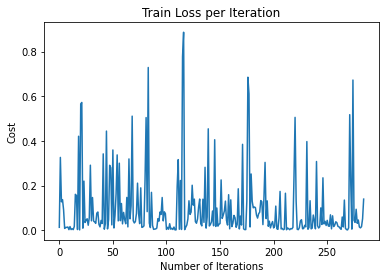

In [204]:
#Plot the Train loss
plt.plot(train_loss)
plt.ylabel('Cost')
plt.xlabel('Number of Iterations')
plt.title('Train Loss per Iteration')

Text(0.5, 1.0, 'Test Loss per Iteration')

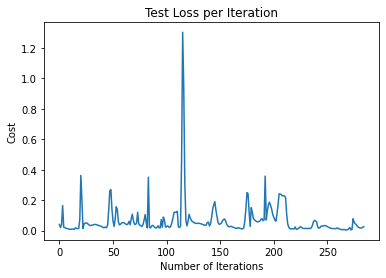

In [201]:
#Plot the Test loss
plt.plot(test_loss)
plt.ylabel('Cost')
plt.xlabel('Number of Iterations')
plt.title('Test Loss per Iteration')

Text(0.5, 1.0, 'Valid Loss per Iteration')

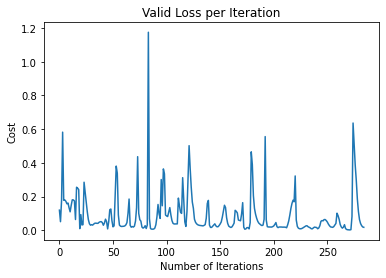

In [202]:
#Plot the Valid loss
plt.plot(valid_loss)
plt.ylabel('Cost')
plt.xlabel('Number of Iterations')
plt.title('Valid Loss per Iteration')

In [197]:
# Model Saving
torch.save(net.state_dict(),'Meme_Vs_Notes.pth')

# Testing the Model with random images

In [198]:
# Loading the model 
net = ConvNet().double()
net.load_state_dict(torch.load('Meme_Vs_Notes.pth'))
net.to(device)

ConvNet(
  (conv1): Conv2d(3, 16, kernel_size=(7, 7), stride=(3, 3))
  (conv2): Conv2d(16, 64, kernel_size=(5, 5), stride=(3, 3))
  (fc1): Linear(in_features=2304, out_features=1000, bias=True)
  (fc2): Linear(in_features=1000, out_features=1, bias=True)
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
)

It is a note.


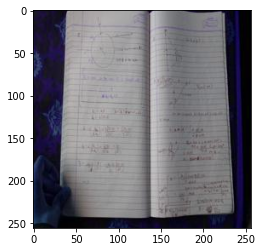

In [196]:
index = 598 
images = np.load('/content/gdrive/My Drive/Memes_Vs_Notes/#Dataset/DATASET_X.npy')
array_images = np.transpose(images,(0,3,1,2))
array_index_image = torch.from_numpy(array_images[index].reshape(1,3,256,256)).double()
with torch.no_grad():
    output = net(array_index_image.to(device))
    output = nn.Sigmoid()(output)
plt.imshow(images[index,:,:,:])
if(output > 0.5):
  print('It is a note.')  # labelled notes as 1
else:
  print('It is a meme.')   #labelled memes as 0 
